<a href="https://colab.research.google.com/github/JoDeMiro/Ember/blob/main/Python_Fuzzy_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# https://www.youtube.com/watch?v=vG6aZEgbAVU

In [ ]:
%%capture
!pip install scikit-fuzzy

In [ ]:
import numpy as np
import skfuzzy as fuzzy
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

In [ ]:
quality = ctrl.Antecedent(np.arange(0, 11, 1), 'quality')
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
tip     = ctrl.Consequent(np.arange(0, 26, 1), 'tip')

In [ ]:
quality.automf(3)
service.automf(3)

In [ ]:
tip['low']    = fuzzy.trimf(tip.universe, [0, 0, 13])
tip['medium'] = fuzzy.trimf(tip.universe, [0, 13, 25])
tip['high']   = fuzzy.trimf(tip.universe, [13, 25, 25])

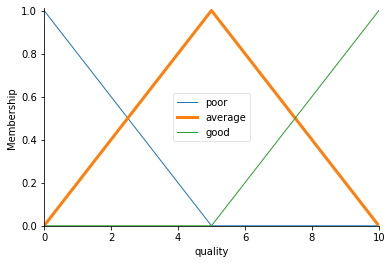

In [ ]:
quality['average'].view()

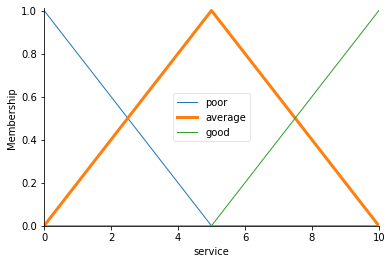

In [ ]:
service['average'].view()

IF quality[poor] AND service[poor] THEN tip[low]
	AND aggregation function : fmin
	OR aggregation function  : fmax


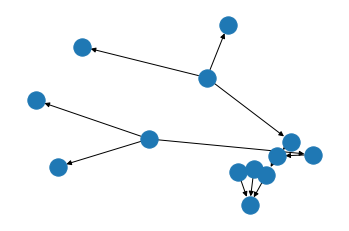

In [ ]:
rule1 = ctrl.Rule(antecedent = quality['poor'] & service['poor'], consequent = tip['low'])

print(rule1)

rule1.view()
plt.show()

IF service[average] AND service[average] THEN tip[medium]
	AND aggregation function : fmin
	OR aggregation function  : fmax


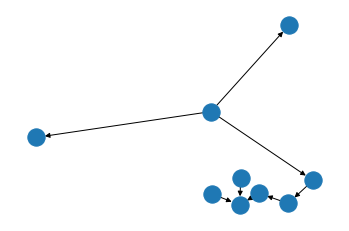

In [ ]:
rule2 = ctrl.Rule(antecedent = service['average'] & service['average'], consequent = tip['medium'])

print(rule2)

rule2.view()
plt.show()

IF service[good] AND service[good] THEN tip[high]
	AND aggregation function : fmin
	OR aggregation function  : fmax


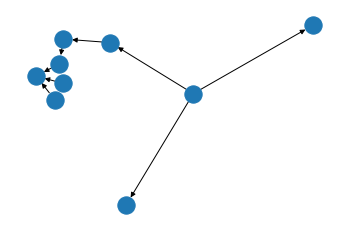

In [ ]:
rule3 = ctrl.Rule(antecedent = service['good'] & service['good'], consequent = tip['high'])

print(rule3)

rule3.view()
plt.show()

In [ ]:
tipping = ctrl.ControlSystem([rule1, rule2, rule3])

tips = ctrl.ControlSystemSimulation(tipping)

In [ ]:
tips.input['quality'] = 6.5
tips.input['service'] = 9.5

tips.compute()

In [ ]:
print(tips.output['tip'])

18.482738780207132


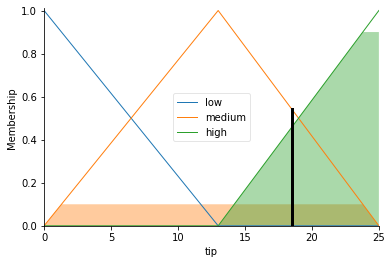

In [ ]:
tip.view(sim =  tips)